# Import necessary libraries

In [45]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np


In [46]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
df = pd.read_csv("Dataset .csv")

In [48]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


# Data Analysis

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [50]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [51]:
df.duplicated().sum()

0

In [52]:
df.isna()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [54]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

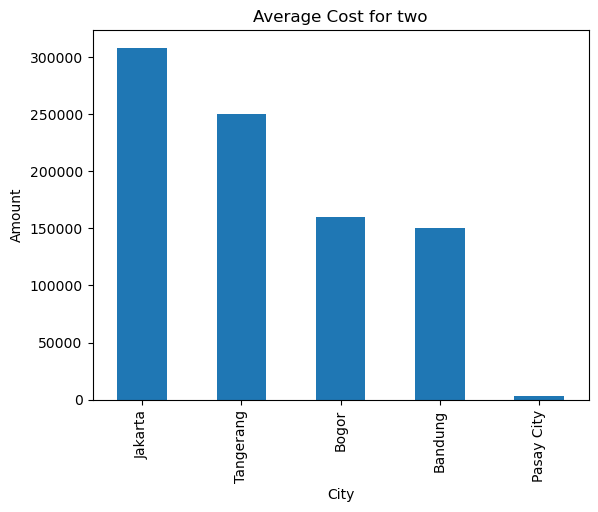

In [55]:
#Group by city and calculate average cost 
df.groupby("City")["Average Cost for two"].mean().sort_values(ascending=False).head().plot(kind="bar")
plt.title("Average Cost for two")
plt.xlabel("City")
plt.ylabel("Amount")
plt.show()

In [56]:
#cuisines total numbers of votes
data=df.groupby("Cuisines")["Votes"].sum().reset_index()

In [57]:
data[data["Votes"]!=0]

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1820,"Western, Asian, Cafe",259
1821,"Western, Fusion, Fast Food",32
1822,World Cuisine,95
1823,"World Cuisine, Mexican, Italian",115


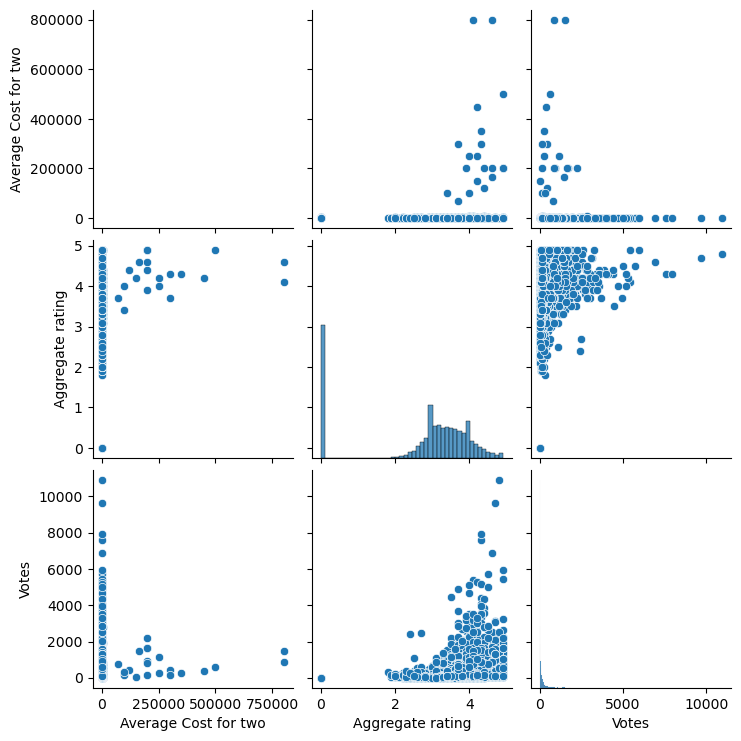

In [58]:
sns.pairplot(df[["Average Cost for two","Aggregate rating","Votes"]])

In [59]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

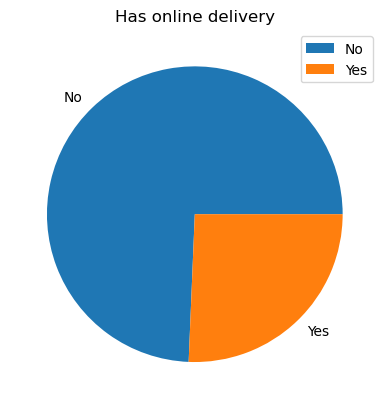

In [60]:
df["Has Online delivery"].value_counts().plot(kind="pie")
plt.title("Has online delivery")
plt.ylabel("")
plt.legend()
plt.show()

In [61]:
df[["Aggregate rating","Rating text"]].sort_values(by="Aggregate rating",ascending=True).head(5000)

,Aggregate rating,Rating text
6615,0.0,Not rated
1994,0.0,Not rated
1995,0.0,Not rated
1996,0.0,Not rated
1997,0.0,Not rated
...,...,...
9238,3.2,Average
2051,3.2,Average
2832,3.2,Average
143,3.2,Average


In [62]:
df = df[df["Rating text"] != "Not rated"]

<function matplotlib.pyplot.show(close=None, block=None)>

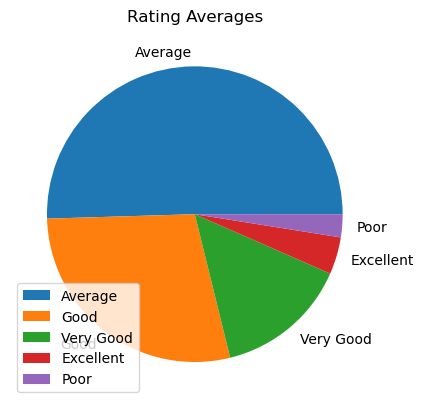

In [63]:
df["Rating text"].value_counts().plot(kind="pie")
plt.title("Rating Averages")
plt.ylabel("")
plt.legend()
plt.show

In [64]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [65]:
X=df[["Average Cost for two","Has Table booking","Has Online delivery","Price range"]]

above 2 below 2.5 Poor
above 2.5 below 3.5 Average
above 3.5 below 4.0 Good
above 4.0 below 4.5 Very good
above 4.5 Excellent

In [66]:
y=df[["Aggregate rating"]]

In [67]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,Yes,No,3
1,1200,Yes,No,3
2,4000,Yes,No,4
3,1500,No,No,4
4,1500,Yes,No,4
...,...,...,...,...
9546,80,No,No,3
9547,105,No,No,3
9548,170,No,No,4
9549,120,No,No,4


In [68]:

labelencoder=preprocessing.LabelEncoder()

In [69]:
X["Has Table booking"]=labelencoder.fit_transform(X["Has Table booking"])

In [70]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,No,3
1,1200,1,No,3
2,4000,1,No,4
3,1500,0,No,4
4,1500,1,No,4
...,...,...,...,...
9546,80,0,No,3
9547,105,0,No,3
9548,170,0,No,4
9549,120,0,No,4


In [71]:
#Has table booking 0 is No 1 is Yes
#Has Online delivery 0 is No 1 is Yes
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

# Scaling

In [28]:
scalar = StandardScaler()

In [29]:
X["Has Online delivery"] = labelencoder.fit_transform(X["Has Online delivery"])
X = pd.DataFrame(scalar.fit_transform(X), columns=X.columns, index=X.index)


In [30]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,-0.019037,2.379783,-0.683024,1.106716
1,-0.013573,2.379783,-0.683024,1.106716
2,0.139413,2.379783,-0.683024,2.181352
3,0.002818,-0.420206,-0.683024,2.181352
4,0.002818,2.379783,-0.683024,2.181352
...,...,...,...,...
9546,-0.074767,-0.420206,-0.683024,1.106716
9547,-0.073401,-0.420206,-0.683024,1.106716
9548,-0.069850,-0.420206,-0.683024,2.181352
9549,-0.072582,-0.420206,-0.683024,2.181352


  # Training data and Testing data(train_test_split)

In [31]:
X_train, X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)# 20% data for testing and 80% for training

In [32]:
def modelresults(predictions):
    print("Mean absolute error on model is {}".format(mean_absolute_error(y_test,predictions)))
    print("Root mean squared error on model is {}".format(np.sqrt(mean_squared_error(y_test,predictions))))

# Linear Regression Model 

In [33]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
predictionsfromlr = lr.predict(X_test)
modelresults(predictionsfromlr)

Mean absolute error on model is 0.393236647627053
Root mean squared error on model is 0.49563771452005856


In [35]:
predictionsfromlr

array([[3.16884755],
       [4.02461269],
       [3.75842266],
       ...,
       [3.59755845],
       [3.22736937],
       [3.22770107]])

In [36]:
from sklearn.tree import DecisionTreeRegressor


In [37]:
params={
    "max_depth": [10,30],
    "min_samples_leaf": [1,2],
    "min_samples_split": [2,5],
}

In [38]:
treemodel = DecisionTreeRegressor()

In [39]:
from sklearn.model_selection import GridSearchCV
grid_tree = GridSearchCV(estimator=treemodel, param_grid=params)
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [40]:
treepredictions=grid_tree.predict(X_test)
print(treepredictions)

[3.22564103 4.25714286 3.81666667 ... 3.62       3.1875     3.04791667]


In [41]:
modelresults(treepredictions)

Mean absolute error on model is 0.3559466171301793
Root mean squared error on model is 0.45490937056715014


In [42]:
from sklearn.metrics import r2_score

# Linear Regression R2
print("Linear Regression R2 Score:", r2_score(y_test, predictionsfromlr))

# Decision Tree R2
print("Decision Tree R2 Score:", r2_score(y_test, treepredictions))

Linear Regression R2 Score: 0.18354220940363442
Decision Tree R2 Score: 0.3122116557083985


# Conclusion:
# R2 score indicates how well the model explains the variance in the target variable.
# The Decision Tree model (R2 ≈ 0.33) explains more variance than Linear Regression (R2 ≈ 0.18).
# However, both scores are relatively low, suggesting that the models do not capture much of the variance in the data.
